1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
cal_house = pd.read_csv('housing.csv')

In [103]:
cal_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [104]:
cal_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [105]:
cal_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

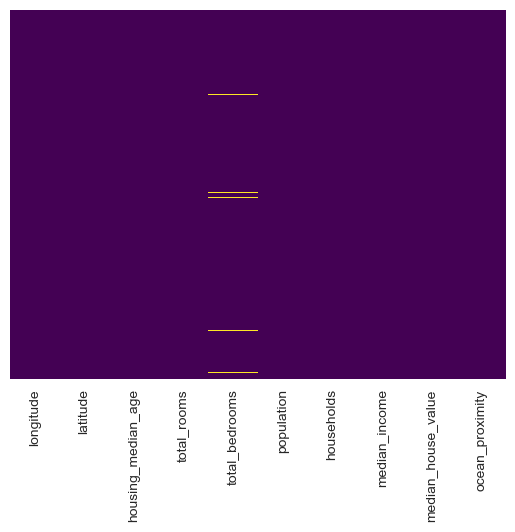

In [121]:
sns.heatmap(cal_house.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [144]:
cal_house['total_bedrooms'] = cal_house['total_bedrooms'].fillna(538)

<AxesSubplot:>

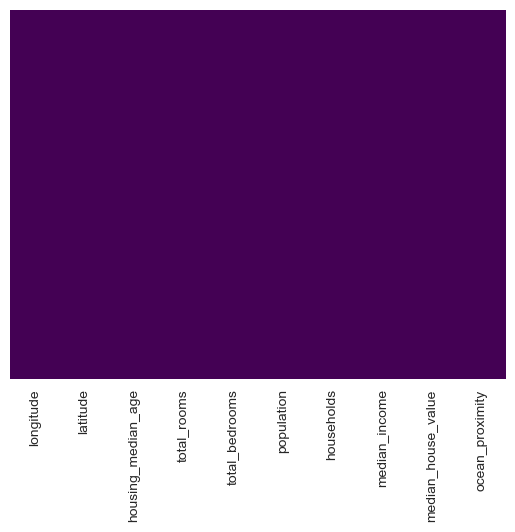

In [145]:
sns.heatmap(cal_house.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [146]:
cal_house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

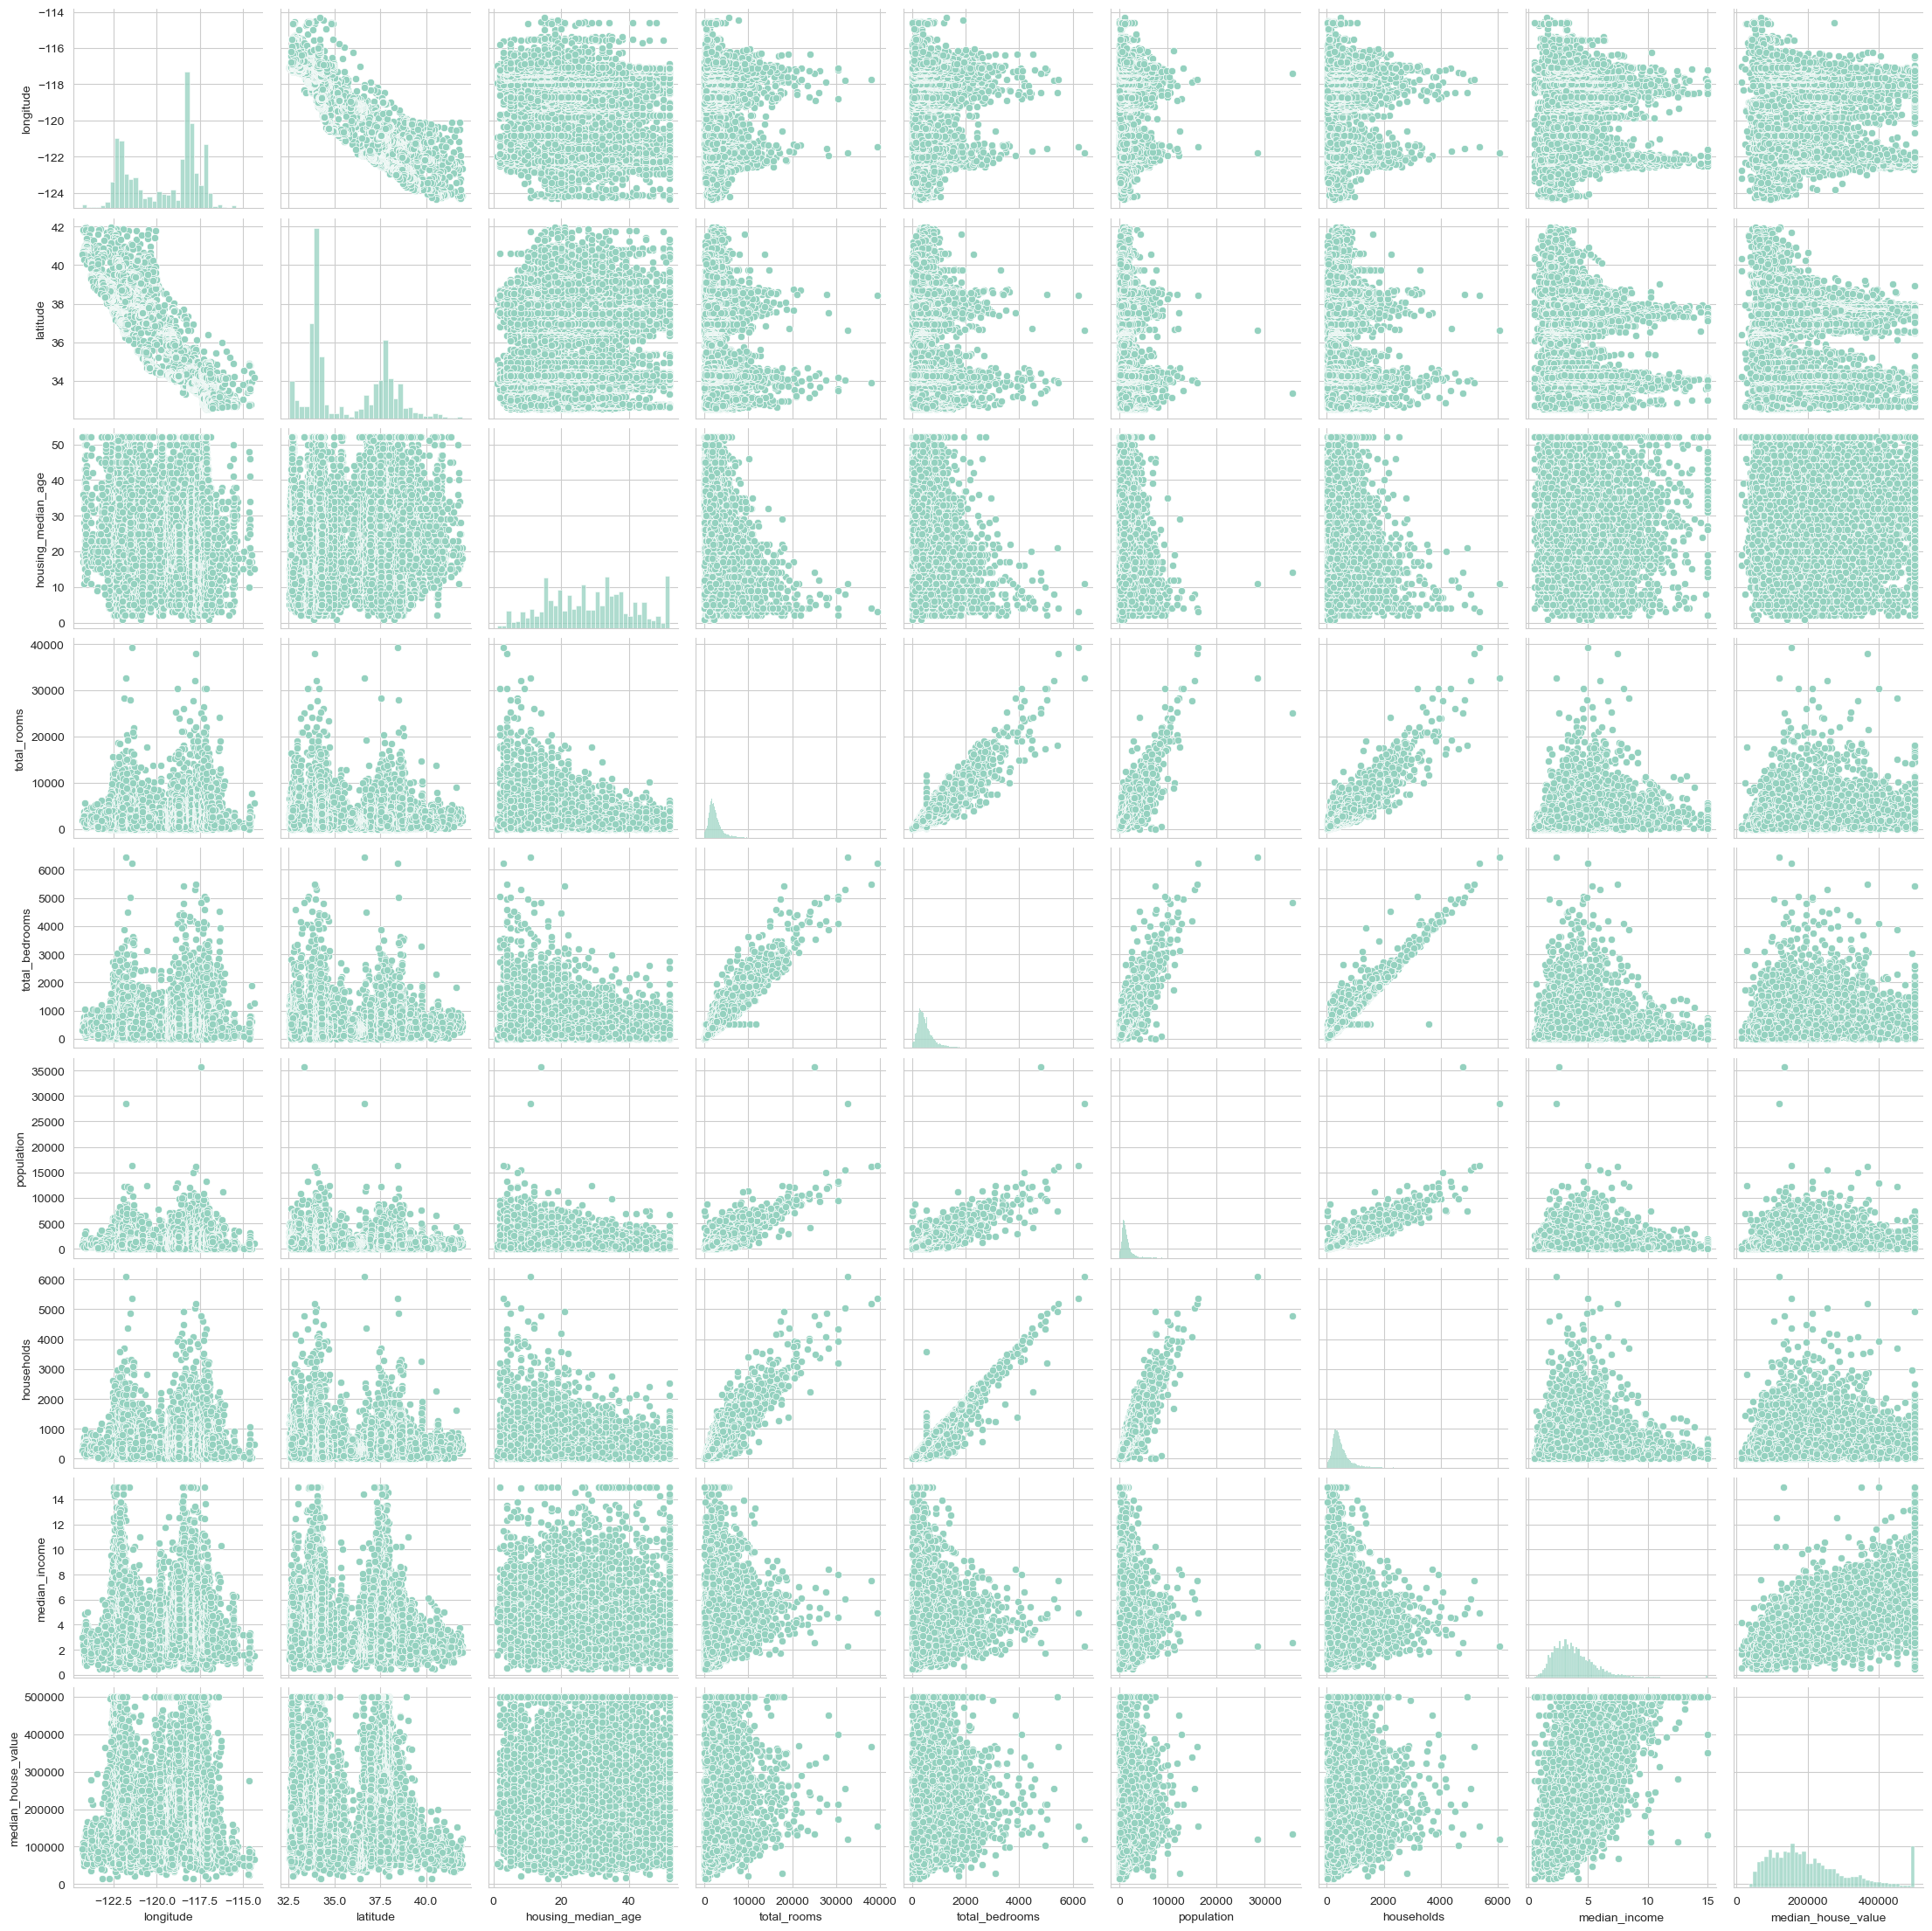

In [147]:
sns.pairplot(cal_house)

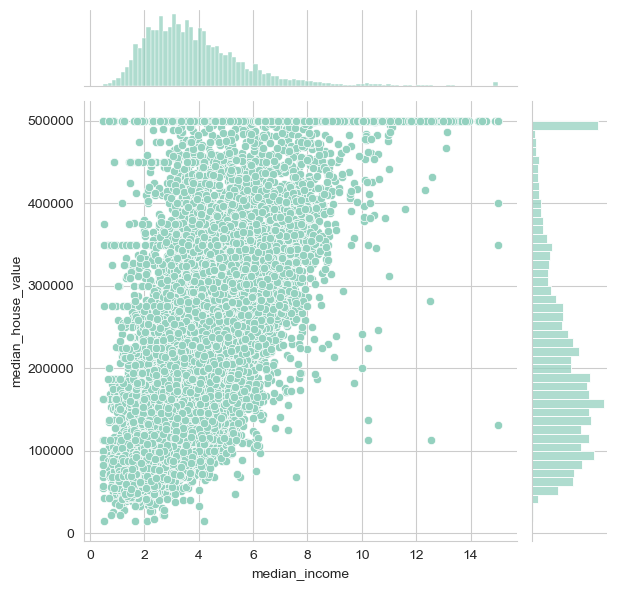

In [148]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='median_income',y='median_house_value',data=cal_house)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

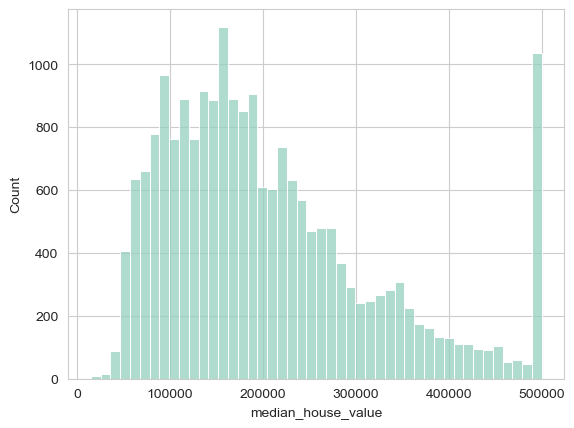

In [149]:
sns.histplot(cal_house['median_house_value'])

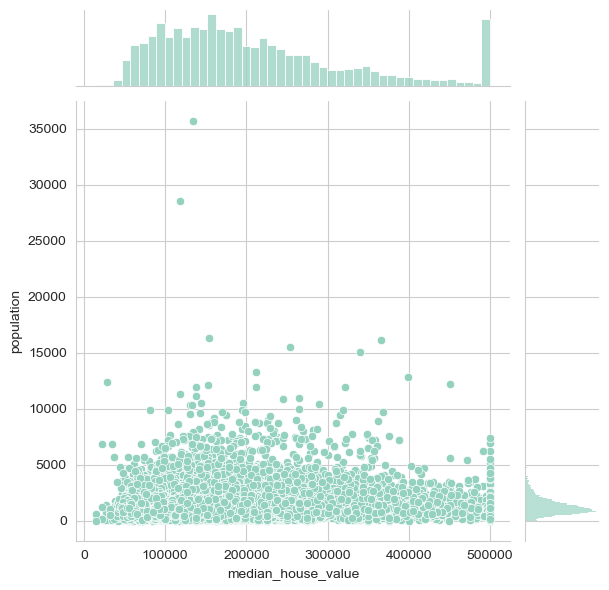

In [150]:
sns.jointplot(x='median_house_value',y='population',data=cal_house)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

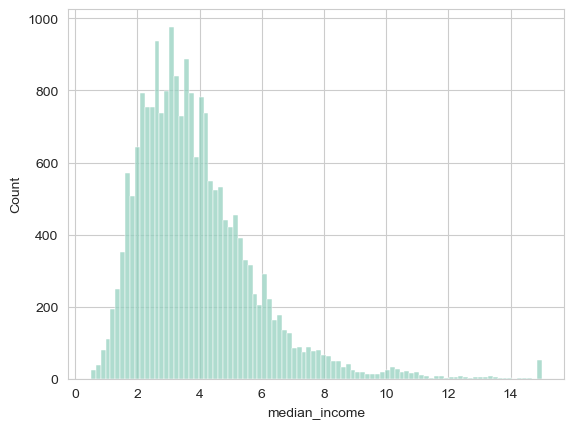

In [151]:
sns.histplot(cal_house['median_income'])

In [152]:
y = cal_house['median_house_value']
X = cal_house[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr = LinearRegression()

In [157]:
lr.fit(X_train,y_train)

LinearRegression()

In [158]:
lr.coef_

array([-4.27684012e+04, -4.24134956e+04,  1.16900118e+03, -8.12850567e+00,
        1.20541801e+02, -3.69519818e+01,  3.73799081e+01,  4.02932160e+04])

In [159]:
predictions = lr.predict( X_test)

Text(0, 0.5, 'Predicted Y')

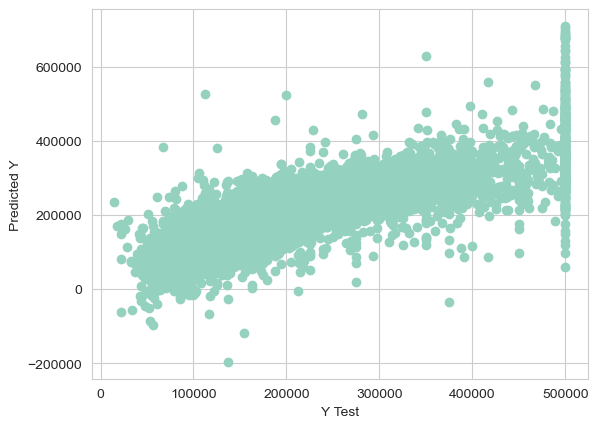

In [163]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [164]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 51273.340618737464
MSE: 4912846437.158189
RMSE: 70091.70020165147


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

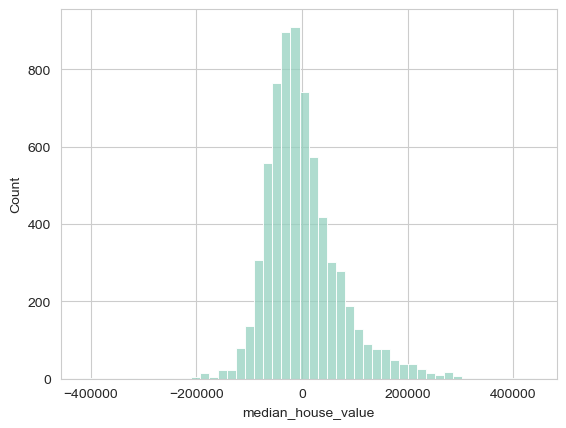

In [167]:
sns.histplot((y_test-predictions),bins=50)

In [169]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
longitude,-42768.401231
latitude,-42413.495648
housing_median_age,1169.001185
total_rooms,-8.128506
total_bedrooms,120.541801
population,-36.951982
households,37.379908
median_income,40293.216026
